# Introduction

In the following notebook we review the univariate local Geary statistic, originally outlined by [Anselin in 1995](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1538-4632.1995.tb00338.x). A more revent review, as well as extension to the multivariate context, is provided by [Anselin in 2017](https://geodacenter.github.io/docs/LA_multivariateGeary1.pdf). 

Local Geary statistics focus on identifying areas of similarity (e.g. positive spatial autocorrelation), indicated by small local Geary values. The use case of the local Geary statistic, as well as its implementation in PySAL, is provided below.

# Univariate Local Geary

The univariate local Geary focuses on the squared differences between values of interest in a given focal unit ($x_i$) and its neighboring units ($x_j$). Formally,

Eq 1. $$ c_i = \sum_j w_{ij} (x_i - x_j)^2 $$ 

where $w_{ij}$ is a spatial weights matrix specified to the user's interest (e.g. Queen, Rook, distance-based, etc). Anselin points out that 'because the squared deviations cancel out the mean', the input values need not be standardized. However, for both user convenience and  alignment with the preferred standardization in the multivariate local Geary statistic, the PySAL implementation automatically standardizes the input values. 

We can apply the PySAL implementation of the univariate local Geary statistic to its original implementation in [GeoDa](https://geodacenter.github.io/workbook/6a_local_auto/lab6a.html#local-geary). We load in the Guerry 1833 dataset and focus on the column `Donatns`. The variable captures the total donations to the poor for a given political unit. We import some necessary modules and define `Donatns` as `x`:

In [1]:
import libpysal
import geopandas as gpd
guerry = libpysal.examples.load_example('Guerry')
guerry_ds = gpd.read_file(guerry.get_path('Guerry.shp'))
x = guerry_ds['Donatns']

We now make a Queen-contiguity weights object to describe the relationship between the units.

In [2]:
w = libpysal.weights.Queen.from_dataframe(guerry_ds)

We can now apply the univariate local Geary function on the dataset.

In [3]:
from esda.local_geary import Local_Geary

In [4]:
lG = Local_Geary(connectivity=w).fit(x)

The attributes of interest on the resulting `lG` object are the local Geary values (stored in `localG`).

In [6]:
lG.localG

array([1.82087039e-01, 5.60014026e-01, 9.75294606e-01, 2.15906938e-01,
       6.17372564e-01, 3.84450059e-02, 2.43181756e-01, 9.71802819e-01,
       4.06447101e-02, 7.24722785e-01, 6.30952854e-02, 2.42104497e-02,
       1.59496916e+01, 9.29326006e-01, 9.65188634e-01, 1.32383286e+00,
       3.31775497e-01, 2.99446505e+00, 9.43946814e-01, 2.99570159e+00,
       3.66702291e-01, 2.09592365e+00, 1.46515861e+00, 1.82118455e-01,
       3.10216680e+00, 5.43063937e-01, 5.74532559e+00, 4.79160197e-02,
       1.58993089e-01, 7.18327253e-01, 1.24297849e+00, 8.72629331e-02,
       7.52809650e-01, 4.56515485e-01, 3.86766562e-01, 1.17632604e-01,
       6.90884685e-01, 2.87206102e+00, 4.10455112e-01, 4.04349959e-01,
       1.14211758e-01, 9.59519953e-01, 3.51347976e-01, 7.30240974e-01,
       4.40370938e-01, 7.20360356e-02, 1.66241706e+00, 5.83258909e+00,
       2.30332507e-01, 4.38369688e-01, 8.41461470e-01, 1.52959486e+00,
       4.32157479e-02, 2.08325903e+00, 1.19722984e+00, 1.28169257e+00,
      

The associated simulated p-values are stored in the attribute `p_sim`.

In [7]:
lG.p_sim

array([0.199, 0.055, 0.063, 0.17 , 0.466, 0.002, 0.16 , 0.409, 0.023,
       0.299, 0.011, 0.013, 0.128, 0.466, 0.007, 0.027, 0.006, 0.135,
       0.314, 0.07 , 0.003, 0.166, 0.288, 0.106, 0.076, 0.362, 0.028,
       0.013, 0.029, 0.292, 0.233, 0.006, 0.483, 0.002, 0.128, 0.069,
       0.333, 0.204, 0.287, 0.137, 0.052, 0.371, 0.19 , 0.498, 0.268,
       0.005, 0.231, 0.023, 0.111, 0.221, 0.275, 0.24 , 0.019, 0.059,
       0.456, 0.318, 0.071, 0.256, 0.029, 0.015, 0.27 , 0.38 , 0.455,
       0.132, 0.407, 0.144, 0.074, 0.128, 0.257, 0.156, 0.11 , 0.213,
       0.014, 0.22 , 0.005, 0.14 , 0.037, 0.028, 0.006, 0.001, 0.038,
       0.491, 0.001, 0.387, 0.238])

We can map these values after placing them back into the dataset.

In [8]:
guerry_ds['localG_Donatns'] = lG.localG
guerry_ds['localG_Donatns_p_sim'] = lG.p_sim

From here you may be interested in mapping the local Geary values...

<AxesSubplot:>

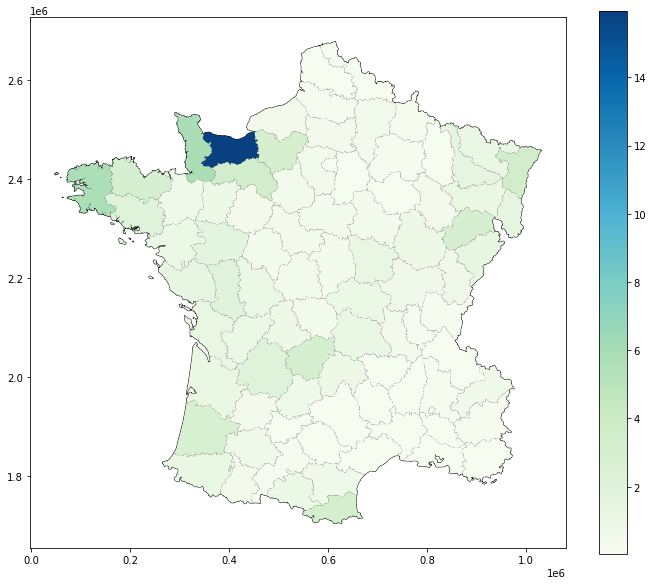

In [11]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
guerry_ds.plot(color='white', edgecolor='black', ax=ax)
guerry_ds.plot(column='localG_Donatns',
               cmap='GnBu',
               legend=True, ax=ax)

In [ ]:
Or mapping the accompanying significance values below a certain threshold...

<AxesSubplot:>

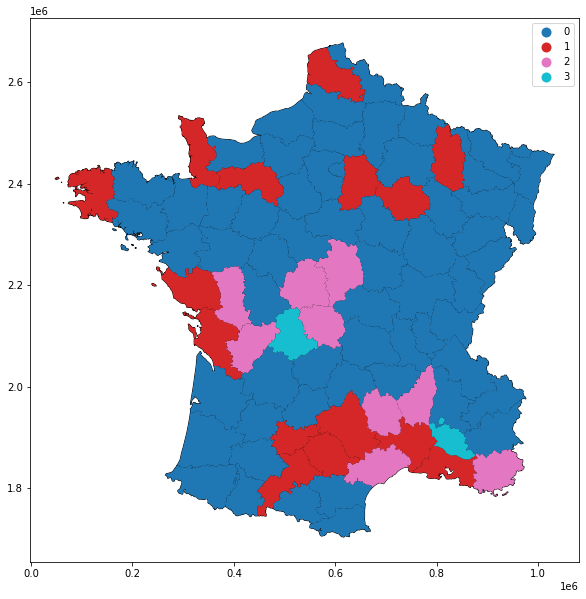

In [15]:
import numpy
guerry_ds['localG_Donatns_p_sim_sig'] = 0
guerry_ds.loc[(guerry_ds['localG_Donatns_p_sim'] <= 0.05), 'localG_Donatns_p_sim_sig'] = 1
guerry_ds.loc[(guerry_ds['localG_Donatns_p_sim'] <= 0.01), 'localG_Donatns_p_sim_sig'] = 2
guerry_ds.loc[(guerry_ds['localG_Donatns_p_sim'] <= 0.001), 'localG_Donatns_p_sim_sig'] = 3

import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
guerry_ds.plot(color='white', edgecolor='black', ax=ax)
guerry_ds.plot(column='localG_Donatns_p_sim_sig',
               categorical=True,
               legend=True, 
               ax=ax)

However, as [Anselin explains](https://geodacenter.github.io/workbook/6a_local_auto/lab6a.html#interpretation-and-significance), what is of substantive interest is identifying areas of similarly high and similarly low values.